In [ ]:
import numpy as np
from utils import time_plot, get_figure, fit_sinusoids, plot_fft
from matplotlib import pyplot as plt

from data.ex_data import get_sea_surface_temp

### Exercise 8

Simulate different synthetic signals (sinusoids, square waves, impulses, …).<br>
• Compute DFT and analyze frequencies.<br>
• Test the different properties of the DFT (linearity, time-shifting, …).<br>
• Review the effect of different sampling rates on the DFT.<br>

Model real-world time series.<br>
• Fit sinusoids with known frequencies.<br>
• Compute DFT and analyze dominant frequencies.<br>
• Compare empirical results with your initial expectations.<br>
• Review how the different DFT components contribute to the signal.<br>

In [ ]:
get_sea_surface_temp()

,YEAR,MONTH,value,DATE
0,1950,1,23.11,1950-01-01
61,1950,2,24.20,1950-02-01
122,1950,3,25.37,1950-03-01
183,1950,4,23.86,1950-04-01
244,1950,5,23.03,1950-05-01
...,...,...,...,...
487,2010,8,19.49,2010-08-01
548,2010,9,19.28,2010-09-01
609,2010,10,19.73,2010-10-01
670,2010,11,20.44,2010-11-01


## Adding sinusoids with common frequency

<>:14: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:15: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:19: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:20: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:14: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:15: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:19: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences wil

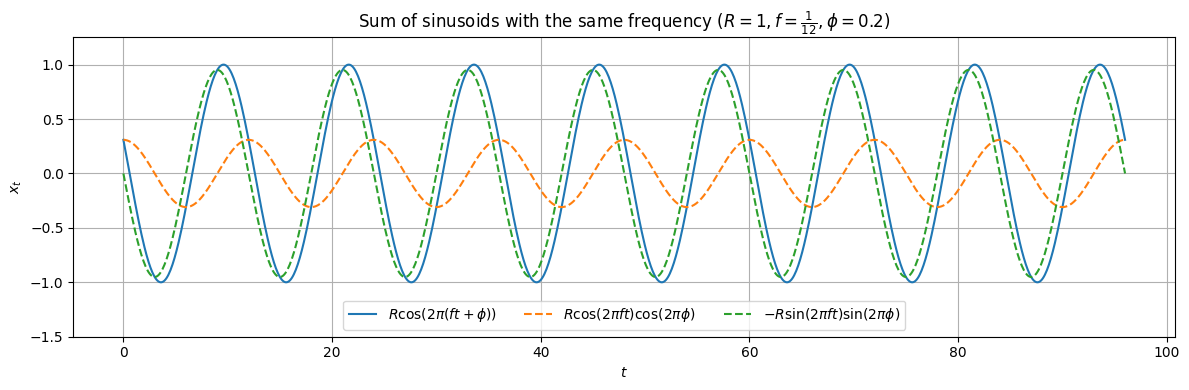

In [ ]:
P = 12                                      # Period of the sinusoids
t = np.linspace(0, P*8, 1000)               # Plot 8 periods with 1000 points
f = 1/P                                     # Frequency of the sinusoids
R = 1                                       # Amplitude of the sinusoids
phi = 1/5                                   # Phase shift of the sinusoids

c_t = R * np.cos(2 * np.pi * (f*t + phi))
cos_component = R * np.cos(2 * np.pi * f * t) * np.cos(2 * np.pi * phi)
sin_component = -R * np.sin(2 * np.pi * f * t) * np.sin(2 * np.pi * phi)

fig, ax = time_plot(
    t,
    c_t,
    label='$R\cos(2\pi (ft + \phi))$',
    title=f'Sum of sinusoids with the same frequency ($R={R}, f=\\frac{{1}}{{{P}}}, \phi={phi}$)',
    return_fig=True,
    ylim=(-R-.5, R+.25),
)
ax.plot(t, cos_component, label='$R\cos(2\pi ft)\cos(2\pi \phi)$', linestyle='--')
ax.plot(t, sin_component, label='$-R\sin(2\pi ft)\sin(2\pi \phi)$', linestyle='--')
ax.legend(loc='lower center', ncols=3)
fig.tight_layout()

## Fitting sinusoids

### Single sinusoid

In [ ]:
data = get_sea_surface_temp()
data.head()

,YEAR,MONTH,value,DATE
0,1950,1,23.11,1950-01-01
61,1950,2,24.20,1950-02-01
122,1950,3,25.37,1950-03-01
183,1950,4,23.86,1950-04-01
244,1950,5,23.03,1950-05-01


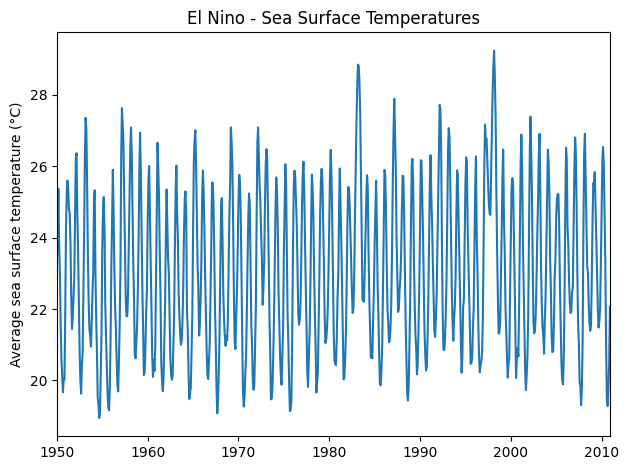

In [ ]:
# Plot
fig, ax = plt.subplots()
ax.plot(data['DATE'], data['value'])
ax.set_title('El Nino - Sea Surface Temperatures')
ax.set_ylabel('Average sea surface temperature (°C)')
_ = ax.set_xlim([data['DATE'].min(), data['DATE'].max()])
plt.tight_layout()
plt.show()

23.092622950819674 [(array([ 1.39438996e+00,  1.20757713e+00,  6.97194979e-01,  8.53817599e-17,
       -6.97194979e-01, -1.20757713e+00, -1.39438996e+00, -1.20757713e+00,
       -6.97194979e-01, -2.56145280e-16,  6.97194979e-01,  1.20757713e+00,
        1.39438996e+00,  1.20757713e+00,  6.97194979e-01,  1.66537587e-15,
       -6.97194979e-01, -1.20757713e+00, -1.39438996e+00, -1.20757713e+00,
       -6.97194979e-01, -5.97672320e-16,  6.97194979e-01,  1.20757713e+00,
        1.39438996e+00,  1.20757713e+00,  6.97194979e-01,  3.24536998e-15,
       -6.97194979e-01, -1.20757713e+00, -1.39438996e+00, -1.20757713e+00,
       -6.97194979e-01, -3.41613350e-15,  6.97194979e-01,  1.20757713e+00,
        1.39438996e+00,  1.20757713e+00,  6.97194979e-01,  3.58689702e-15,
       -6.97194979e-01, -1.20757713e+00, -1.39438996e+00, -1.20757713e+00,
       -6.97194979e-01, -3.75766054e-15,  6.97194979e-01,  1.20757713e+00,
        1.39438996e+00,  1.20757713e+00,  6.97194979e-01,  3.92842406e-15,
    

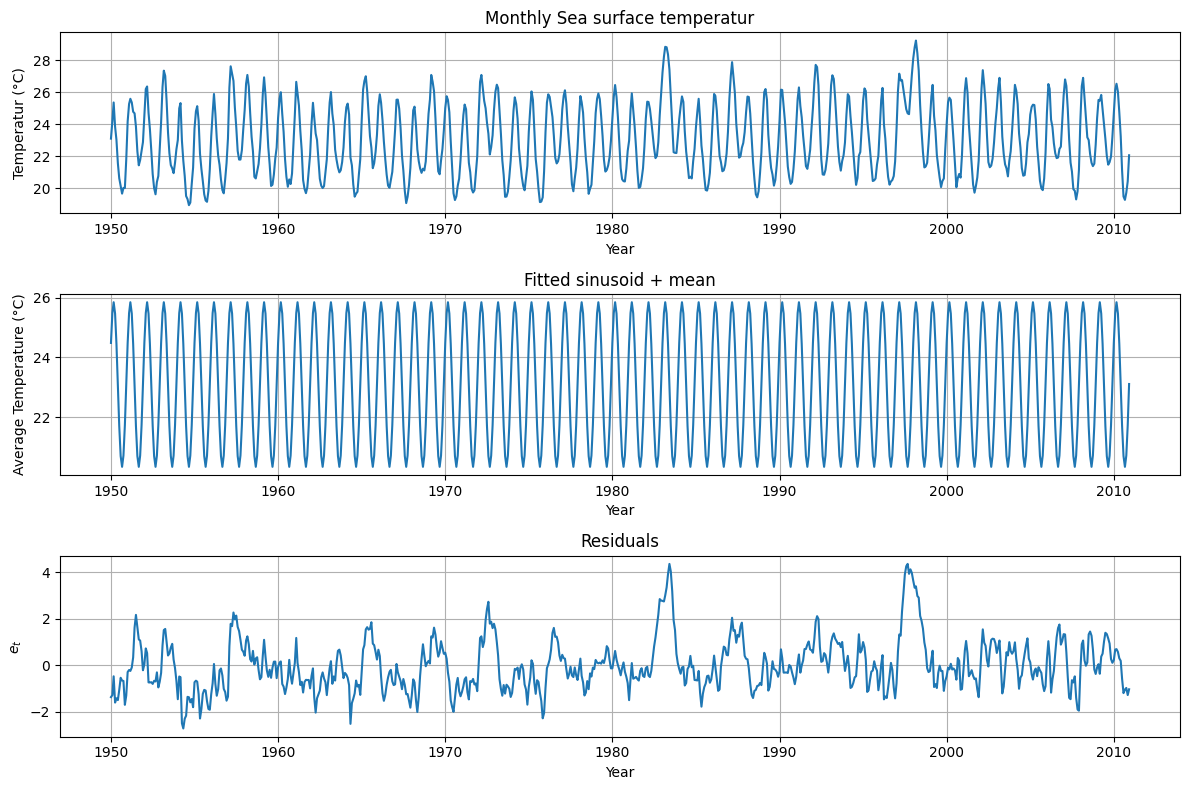

In [ ]:
df = get_sea_surface_temp()
df = df.set_index('DATE')
data = df.asfreq('MS')['value']

results, mu, sinusoids = fit_sinusoids(data, frequencies=[1/12])
print(mu, sinusoids)


fig, axs = get_figure(nrows=3, figsize=(12, 8))
time_plot(
    x=data.index,
    y=data,
    title='Monthly Sea surface temperatur',
    xlabel='Year',
    ylabel='Temperatur (°C)',
    ax=axs[0],
)
time_plot(
    x=data.index,
    y=results.fittedvalues,
    title='Fitted sinusoid + mean',
    xlabel='Year',
    ylabel='Average Temperature (°C)',
    ax=axs[-2],
)
time_plot(
    x=data.index,
    y=results.resid,
    title='Residuals',
    xlabel='Year',
    ylabel='$e_t$',
    ax=axs[-1],
)

### Multiple sinusoids

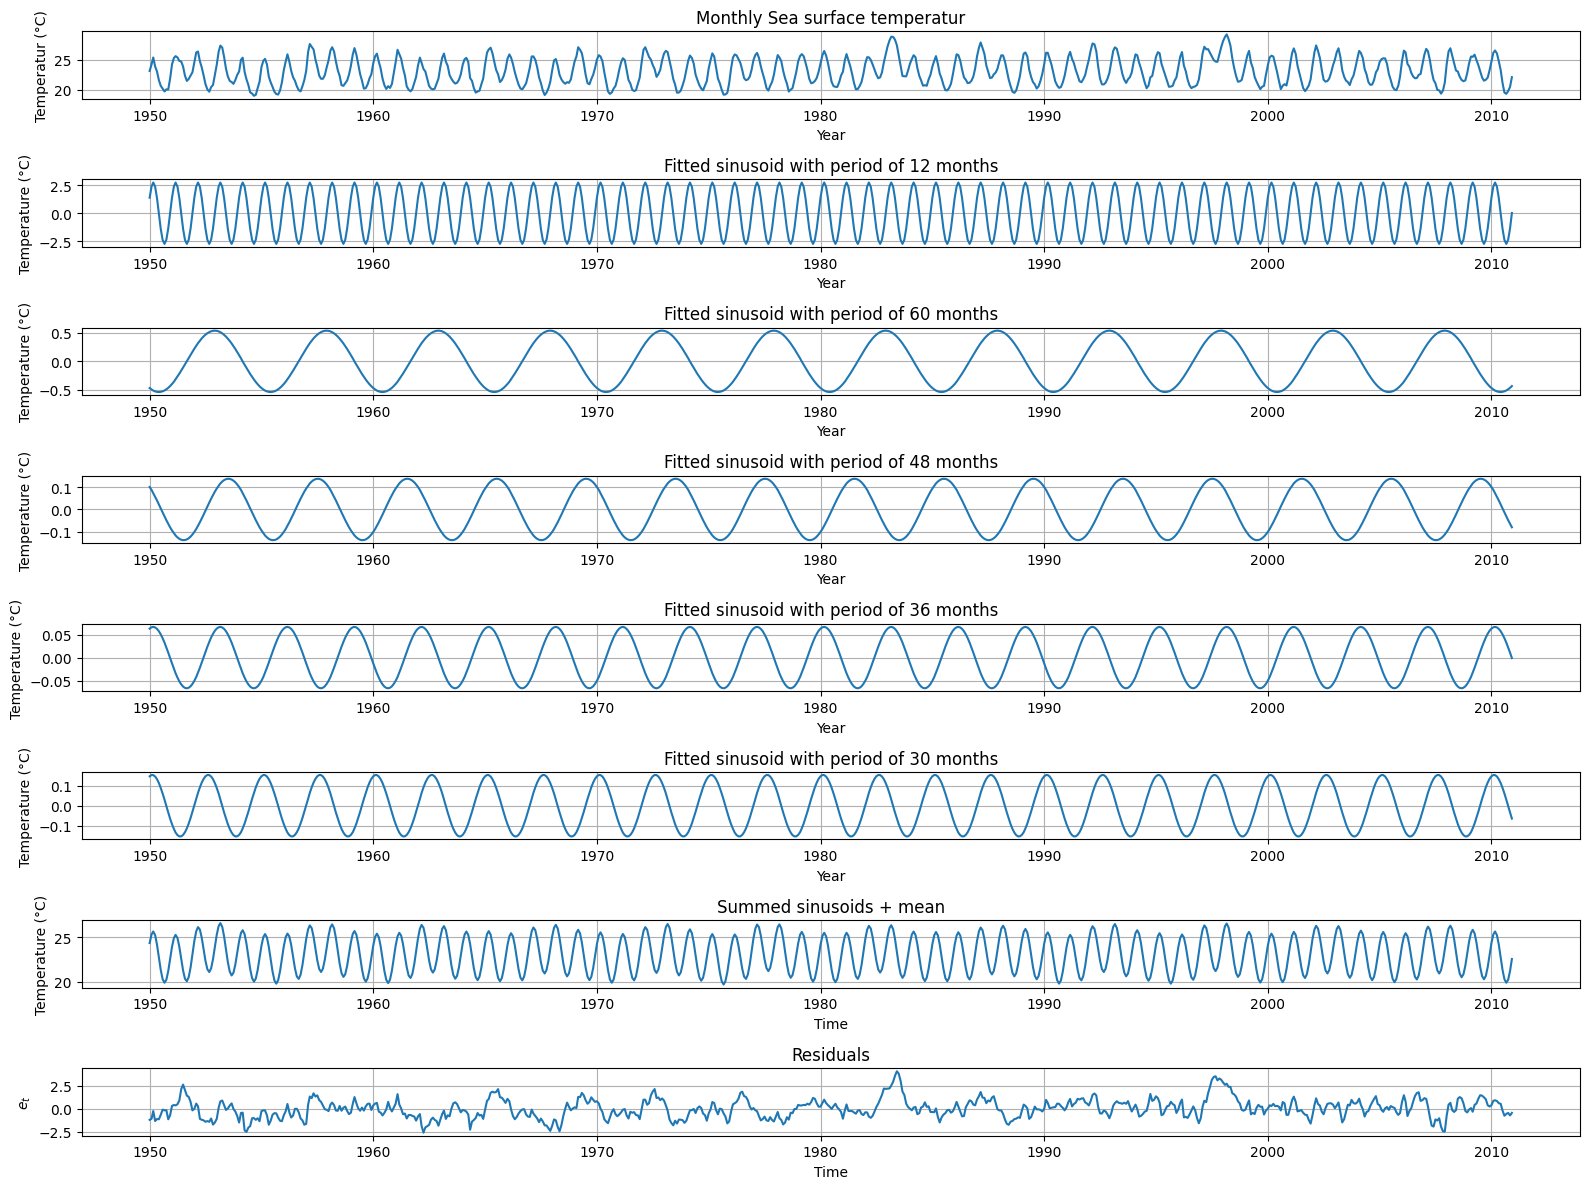

In [ ]:
frequencies = frequencies = [1/12, 1/60, 1/48, 1/36, 1/30] 
results, mu, sinusoids = fit_sinusoids(data, frequencies=frequencies)

fig, axs = get_figure(nrows=3+len(sinusoids), figsize=(16, 12))
time_plot(
    x=data.index,
    y=data,
    title='Monthly Sea surface temperatur',
    xlabel='Year',
    ylabel='Temperatur (°C)',
    ax=axs[0],
)
for i, (sinusoid, frequency) in enumerate(zip(sinusoids, frequencies)):
    time_plot(
        x=data.index,
        y=sum(sinusoid),
        title=f'Fitted sinusoid with period of {1/frequency:.0f} months',
        xlabel='Year',
        ylabel='Temperature (°C)',
        ax=axs[i+1],
    )
time_plot(
    x=data.index,
    y=results.fittedvalues,
    title='Summed sinusoids + mean',
    xlabel='Time',
    ylabel='Temperature (°C)',
    ax=axs[-2],
)
time_plot(
    x=data.index,
    y=results.resid,
    title='Residuals',
    xlabel='Time',
    ylabel='$e_t$',
    ax=axs[-1],
)

## Discrete Fourier Transform

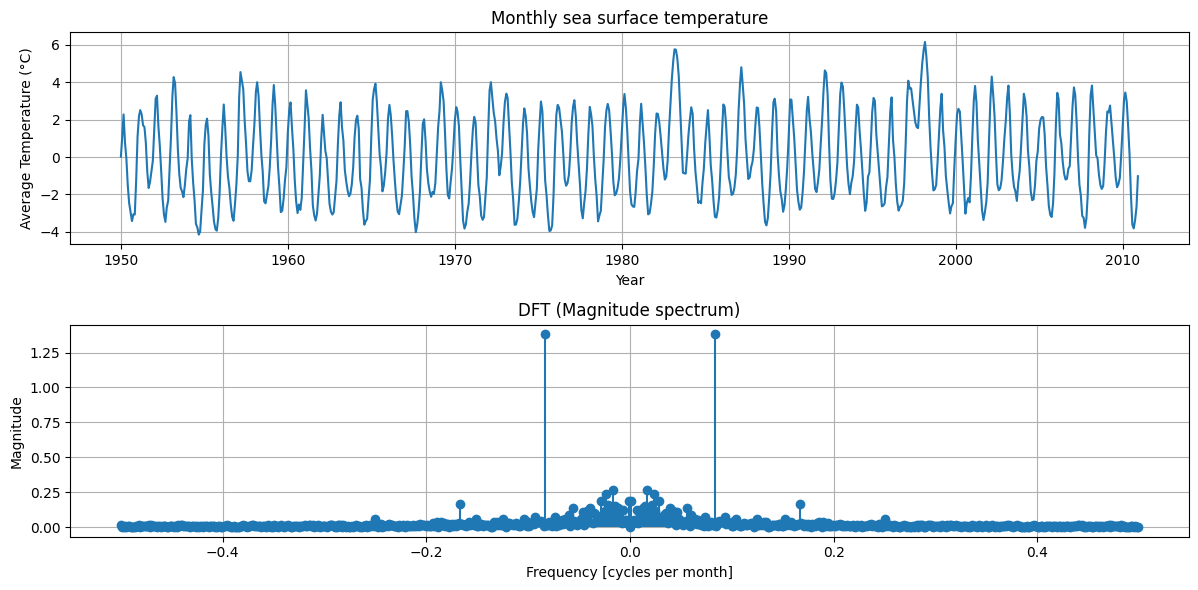

In [ ]:
data = data - data.mean()

fig, axs = get_figure(nrows=2, figsize=(12, 6))

time_plot(
    x=data.index,
    y=data,
    title='Monthly sea surface temperature',
    xlabel='Year',
    ylabel='Average Temperature (°C)',
    ax=axs[0],
)

plot_fft(
    axs[1],
    data,
    sample_spacing_name="month",   
    show_negative_freqs=True
)

### Simple signals DFT

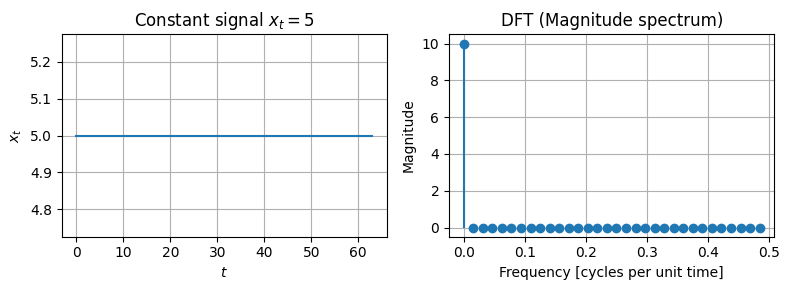

In [ ]:
n = 64
t = np.arange(n)
data = np.ones(n)*5

fig, axs = get_figure(ncols=2, figsize=(8, 3))
time_plot(t, data, ax=axs[0], title="Constant signal $x_t=5$")
plot_fft(axs[1], data)

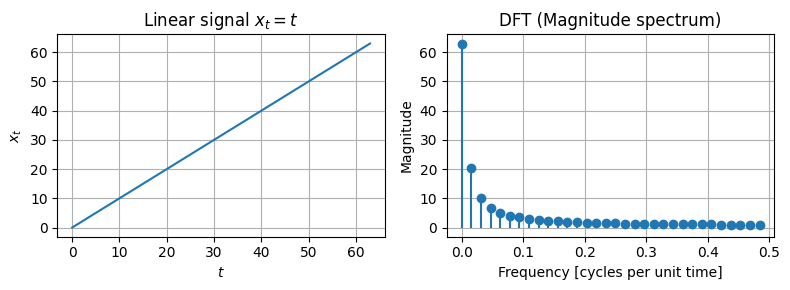

In [ ]:
n = 64
t = np.arange(n)
data = t

fig, axs = get_figure(ncols=2, figsize=(8, 3))
time_plot(t, data, ax=axs[0], title="Linear signal $x_t=t$")
plot_fft(axs[1], data)

<>:8: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:8: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
/var/folders/4b/26rq547d04x8qvf8fylq7n0c0000gn/T/ipykernel_81883/111936159.py:8: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  axs[0].set_title("Kronecker delta $\delta_{t,32}$")


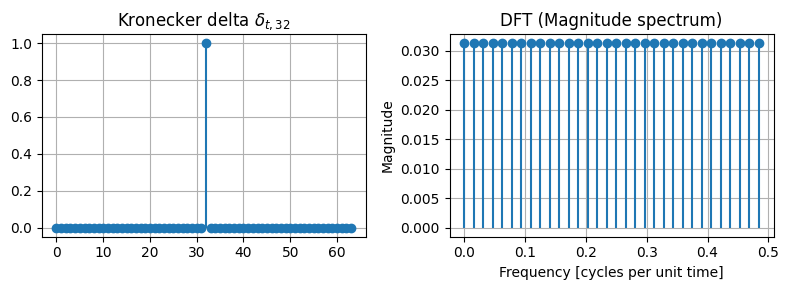

In [ ]:
n = 64
t = np.arange(n)
data = np.zeros(n)
data[32] = 1

fig, axs = get_figure(ncols=2, figsize=(8, 3))
axs[0].stem(t, data, basefmt=" ")
axs[0].set_title("Kronecker delta $\delta_{t,32}$")
plot_fft(axs[1], data)

In [ ]:
n = 64
t = np.arange(n)
data = np.zeros(n)
data[20:40] = 1

fig, axs = get_figure(ncols=2, figsize=(8, 3))
time_plot(t, data, ax=axs[0], title="Square signal")
plot_fft(axs[1], data)

### Linearity of the DFT

<>:9: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:11: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:13: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:9: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:11: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:13: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
/var/folders/4b/26rq547d04x8qvf8fylq7n0c0000gn/T/ipykernel_81883/222004290.py:

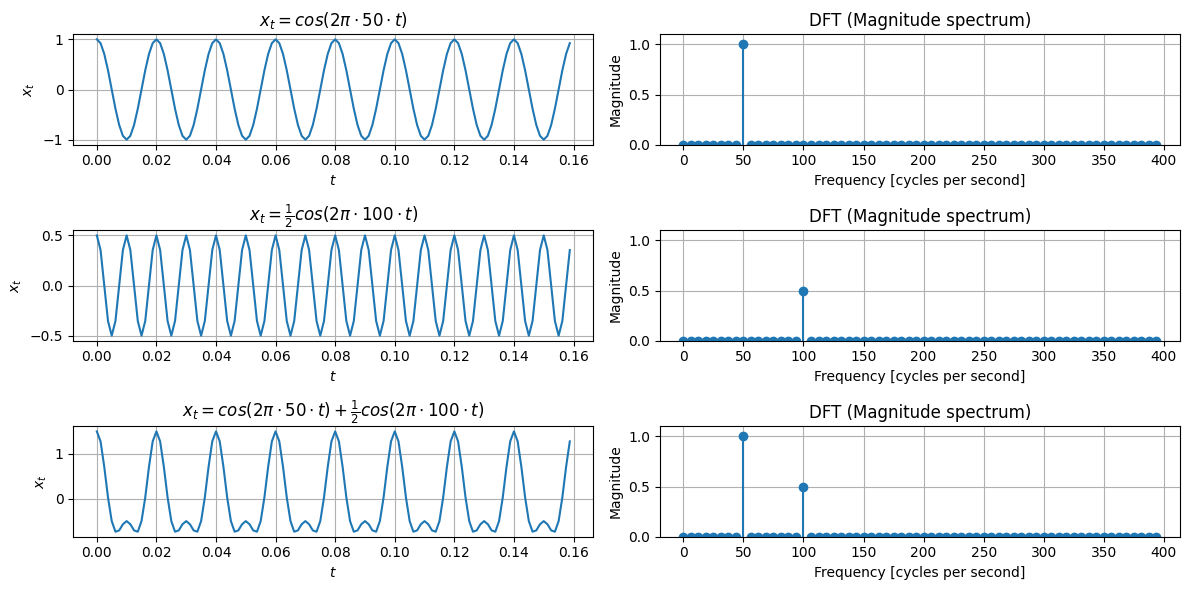

In [ ]:
n = 128             
sr = 1.0 / 800.0   

t = np.linspace(0.0, n*sr, n, endpoint=False)
signal1 = np.cos(2.0 * np.pi * 50 * t)
signal2 = 0.5 * np.cos(2.0 * np.pi * 100 * t)

fig, axs = get_figure(ncols=2, nrows=3, figsize=(12, 6))
time_plot(t, signal1, ax=axs[0], title="$x_t=cos(2\pi \cdot 50 \cdot t)$")
plot_fft(axs[1], signal1, sample_spacing=sr, sample_spacing_name="second")
time_plot(t, signal2, ax=axs[2], title="$x_t=\\frac{1}{2}cos(2\pi \cdot 100 \cdot t)$")
plot_fft(axs[3], signal2, sample_spacing=sr, sample_spacing_name="second")
time_plot(t, signal1+signal2, ax=axs[4], title="$x_t=cos(2\pi \cdot 50 \cdot t)+\\frac{1}{2}cos(2\pi \cdot 100 \cdot t)$")
plot_fft(axs[5], signal1+signal2, sample_spacing=sr, sample_spacing_name="second")
for ax in axs[1::2]:
    ax.set_ylim(0, 1.1)

(0.0, 500.0)

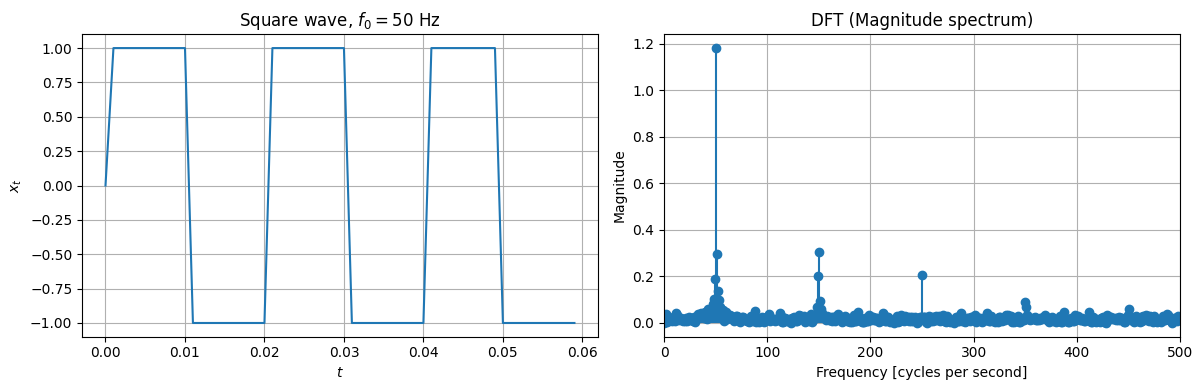

In [ ]:
n = 1024
fs = 1000.0          
sr = 1.0 / fs
t = np.arange(n) * sr
f0 = 50.0            

square = np.sign(np.sin(2 * np.pi * f0 * t))

fig, axs = get_figure(nrows=1, ncols=2, figsize=(12, 4))

# only first 3 periods
period = int(fs / f0)
time_plot(
    t[:3*period], square[:3*period],
    ax=axs[0],
    title=r"Square wave, $f_0 = 50$ Hz"
)

plot_fft(
    axs[1],
    square,
    sample_spacing=sr,
    sample_spacing_name="second"
)
axs[1].set_xlim(0, fs/2)  # only positive frequencies


### Single Impulse Middle

Text(0.5, 1.0, 'DFT magnitude – flat spectrum')

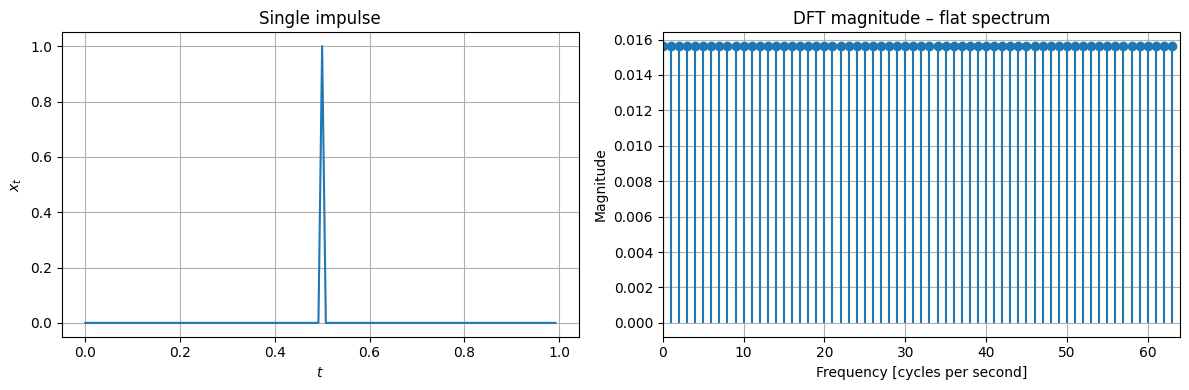

In [ ]:
# Single impulse in the middle
n = 128
fs = 128.0
sr = 1.0 / fs
t = np.arange(n) * sr

impulse = np.zeros(n)
impulse[n//2] = 1.0

fig, axs = get_figure(nrows=1, ncols=2, figsize=(12, 4))

time_plot(
    t, impulse,
    ax=axs[0],
    title="Single impulse"
)

plot_fft(
    axs[1],
    impulse,
    sample_spacing=sr,
    sample_spacing_name="second"
)
axs[1].set_xlim(0, fs/2)
axs[1].set_title("DFT magnitude – flat spectrum")

Text(0.5, 1.0, 'DFT magnitude – comb spectrum')

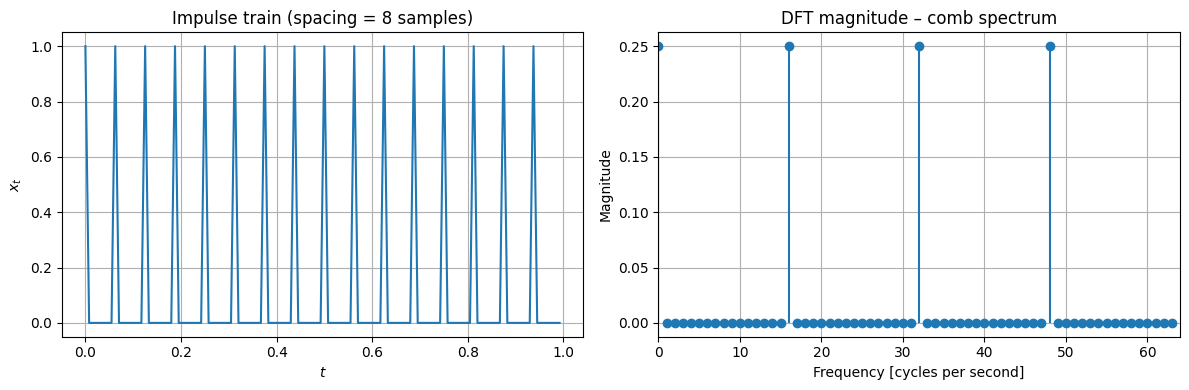

In [ ]:
# Impulse train: every 8 samples
n = 128
fs = 128.0
sr = 1.0 / fs
t = np.arange(n) * sr

impulse_train = np.zeros(n)
impulse_train[::8] = 1.0

fig, axs = get_figure(nrows=1, ncols=2, figsize=(12, 4))

time_plot(
    t, impulse_train,
    ax=axs[0],
    title="Impulse train (spacing = 8 samples)"
)

plot_fft(
    axs[1],
    impulse_train,
    sample_spacing=sr,
    sample_spacing_name="second"
)
axs[1].set_xlim(0, fs/2)
axs[1].set_title("DFT magnitude – comb spectrum")

### Time-shift DFT

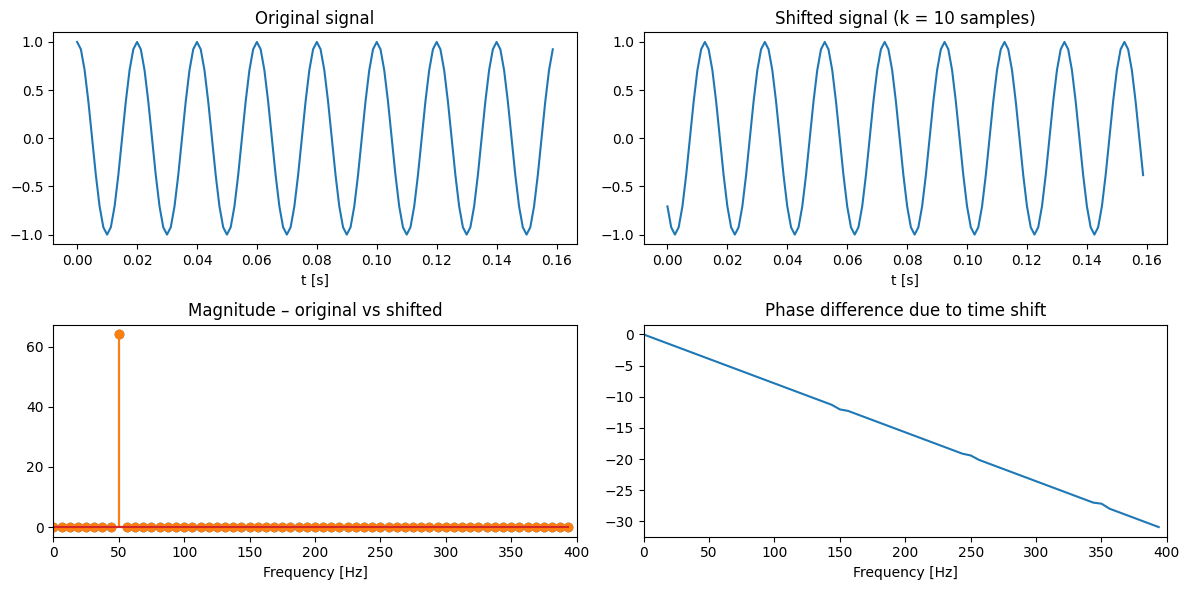

In [ ]:
n = 128
fs = 800.0
sr = 1.0 / fs
t = np.arange(n) * sr
f0 = 50.0

x = np.cos(2 * np.pi * f0 * t)

k = 10
x_shift = np.roll(x, k)

X = np.fft.fft(x)
X_shift = np.fft.fft(x_shift)
freqs = np.fft.fftfreq(n, d=sr)

mask = freqs >= 0
freqs_pos = freqs[mask]
X_pos = X[mask]
X_shift_pos = X_shift[mask]

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].plot(t, x)
axs[0, 0].set_title("Original signal")
axs[0, 0].set_xlabel("t [s]")

axs[0, 1].plot(t, x_shift)
axs[0, 1].set_title(f"Shifted signal (k = {k} samples)")
axs[0, 1].set_xlabel("t [s]")

# Magnitude
axs[1, 0].stem(freqs_pos, np.abs(X_pos))
axs[1, 0].stem(freqs_pos, np.abs(X_shift_pos), linefmt='C1-', markerfmt='C1o')
axs[1, 0].set_xlim(0, fs/2)
axs[1, 0].set_title("Magnitude – original vs shifted")
axs[1, 0].set_xlabel("Frequency [Hz]")

phase_diff = np.angle(X_shift_pos) - np.angle(X_pos)
phase_diff = np.unwrap(phase_diff)

axs[1, 1].plot(freqs_pos, phase_diff)
axs[1, 1].set_xlim(0, fs/2)
axs[1, 1].set_title("Phase difference due to time shift")
axs[1, 1].set_xlabel("Frequency [Hz]")

plt.tight_layout()

### Sampling-rate effects & aliasing

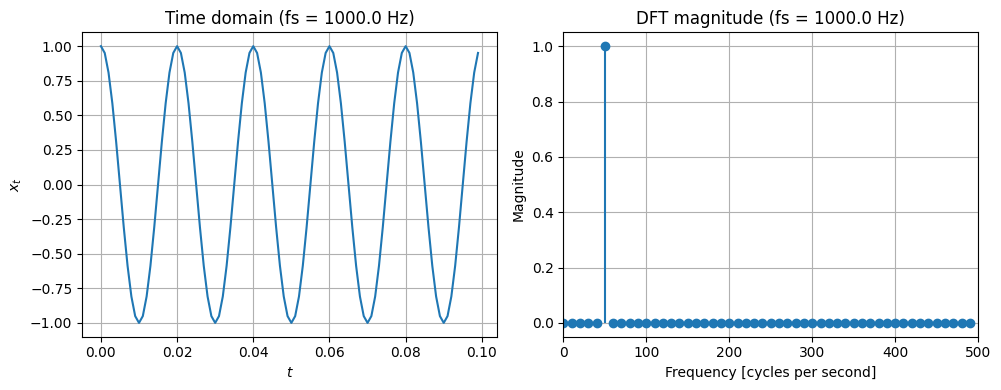

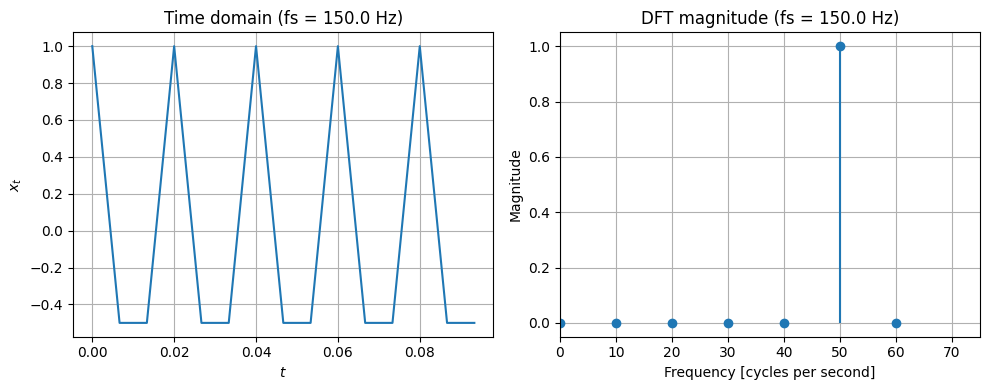

In [ ]:
f0 = 50.0          # true signal frequency

def sample_and_plot(fs, n_cycles=5):
    sr = 1.0 / fs
    T = n_cycles / f0
    n = int(T * fs)
    t = np.arange(n) * sr
    x = np.cos(2 * np.pi * f0 * t)

    fig, axs = get_figure(nrows=1, ncols=2, figsize=(10, 4))
    time_plot(
        t, x,
        ax=axs[0],
        title=f"Time domain (fs = {fs} Hz)"
    )
    plot_fft(
        axs[1],
        x,
        sample_spacing=sr,
        sample_spacing_name="second"
    )
    axs[1].set_xlim(0, fs/2)
    axs[1].set_title(f"DFT magnitude (fs = {fs} Hz)")

sample_and_plot(fs=1000.0)

sample_and_plot(fs=150.0)

Text(0.5, 1.0, 'DFT magnitude – shows aliased frequency')

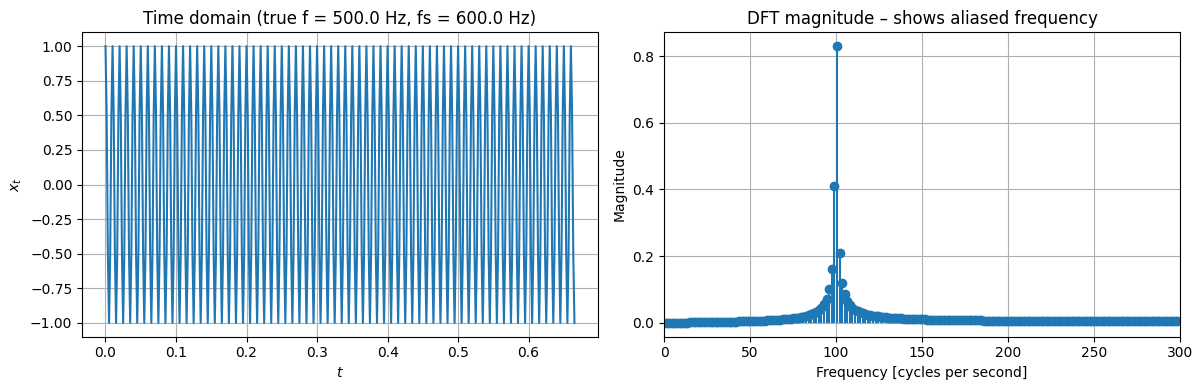

In [ ]:
f0 = 500.0        
fs = 600.0          
sr = 1.0 / fs

n = 400
t = np.arange(n) * sr
x = np.cos(2 * np.pi * f0 * t)

fig, axs = get_figure(nrows=1, ncols=2, figsize=(12, 4))

time_plot(
    t, x,
    ax=axs[0],
    title=f"Time domain (true f = {f0} Hz, fs = {fs} Hz)"
)

plot_fft(
    axs[1],
    x,
    sample_spacing=sr,
    sample_spacing_name="second"
)
axs[1].set_xlim(0, fs/2)
axs[1].set_title("DFT magnitude – shows aliased frequency")

### Reconstruct with inverse DFT

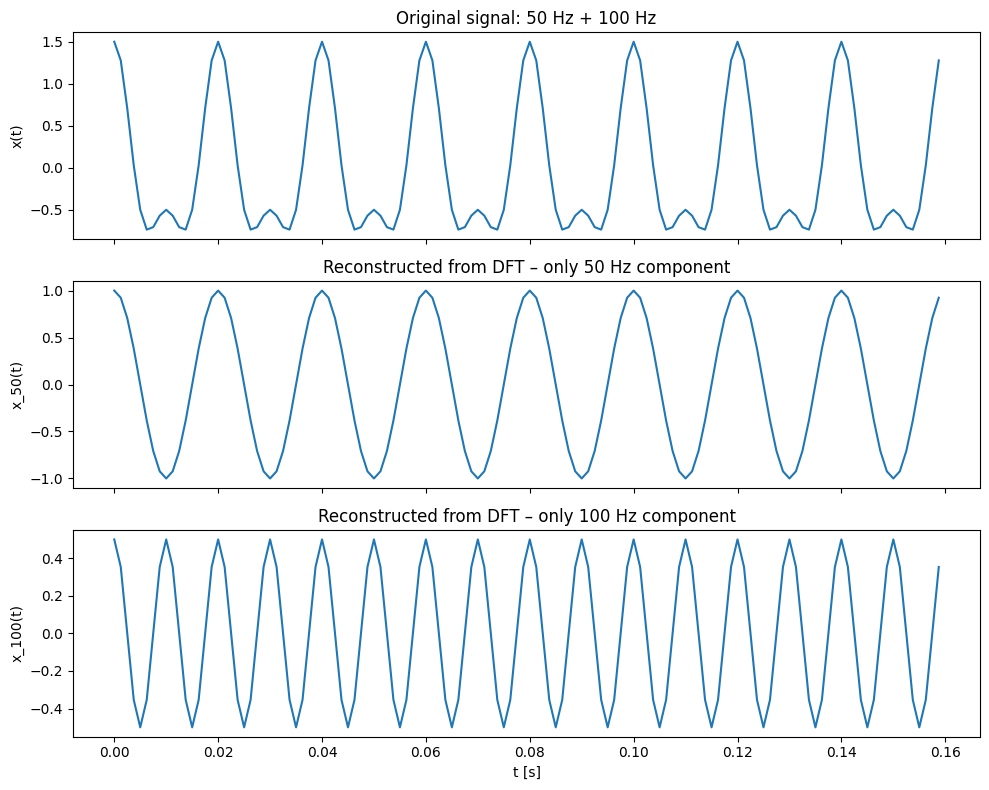

In [ ]:
n = 128
fs = 800.0
sr = 1.0 / fs
t = np.arange(n) * sr

signal1 = np.cos(2 * np.pi * 50 * t)
signal2 = 0.5 * np.cos(2 * np.pi * 100 * t)
x = signal1 + signal2

X = np.fft.fft(x)
freqs = np.fft.fftfreq(n, d=sr)

def keep_frequency_component(X, freqs, target_f, tol=1e-6):
    X_filtered = np.zeros_like(X, dtype=complex)
    mask_pos = np.isclose(freqs,  target_f, atol=tol)
    mask_neg = np.isclose(freqs, -target_f, atol=tol)
    X_filtered[mask_pos | mask_neg] = X[mask_pos | mask_neg]
    return X_filtered

X_50 = keep_frequency_component(X, freqs, 50.0)
x_50 = np.fft.ifft(X_50).real

X_100 = keep_frequency_component(X, freqs, 100.0)
x_100 = np.fft.ifft(X_100).real

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(t, x)
axs[0].set_title("Original signal: 50 Hz + 100 Hz")
axs[0].set_ylabel("x(t)")

axs[1].plot(t, x_50)
axs[1].set_title("Reconstructed from DFT – only 50 Hz component")
axs[1].set_ylabel("x_50(t)")

axs[2].plot(t, x_100)
axs[2].set_title("Reconstructed from DFT – only 100 Hz component")
axs[2].set_ylabel("x_100(t)")
axs[2].set_xlabel("t [s]")

plt.tight_layout()